# Import Module

In [3]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Import Data

In [23]:

import io
import requests
url="https://raw.githubusercontent.com/ReyhanAnf/latXGBoost/main/lifeex.csv"
ru=requests.get(url).content

df=pd.read_csv(io.StringIO(ru.decode('utf-8')))

df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


# Analisis Data

In [5]:
df = df[~df['Life expectancy '].isna()]

In [6]:
X = df.drop(columns='Life expectancy ')
y = df['Life expectancy ']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

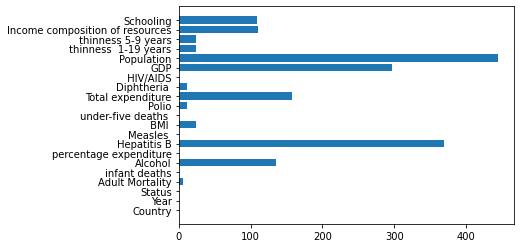

In [ ]:
%matplotlib inline
miss_data(Xtrain)

# Buat Algoritma Training

In [8]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
import numpy as np

In [9]:
numer = Pipeline([
    ('filln', SimpleImputer(strategy='mean'))
])

cate = Pipeline([
 ('fillc', SimpleImputer(strategy='most_frequent')),
    ('endc', OneHotEncoder())
])

prepro = ColumnTransformer([
    ('merik', numer, Xtrain.drop(columns=['Country', 'Status']).columns),
    ('gorik', cate, ['Country', 'Status'])
])

pipa = Pipeline([
    ('pro', prepro),
    ('algo', XGBRegressor(n_jobs=-1,verbose=1))
])

params = {
    'algo__max_depth': np.arange(5,20),
    'algo__max_depth': np.arange(0,5),
'algo__learning_rate' : np.linspace(0, 1, 10)
    }

model = RandomizedSearchCV(pipa, params, cv=3, n_jobs=-1, n_iter=50, verbose=1)

model.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   23.0s finished


[03:01:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('pro',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('merik',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('filln',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                              

print(f'score train :{model.score(Xtrain,ytrain)}\n score test :{model.score(Xtest,ytest)}')

# Hasil

In [24]:

stest = model.score(Xtest, ytest)
strain = model.score(Xtrain, ytrain)

In [17]:
print(f'score train: {strain}\n score test: {stest}')

score train: 0.9813128412065578
 score test: 0.9565288104185413


# Save model

In [25]:

import pickle

pickle.dump(model, open('modelXGB.pkl', 'wb'))